# 3장_2. 네이버 영화 평점


In [1]:
from bs4 import BeautifulSoup  
import pandas as pd

In [2]:
from urllib.request import Request, urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804"

# 코렙으로 인한 문제 해결
req = Request(url_base+url_syb,headers = {'User-Agent': 'Mozilla/5.0'})
html = urlopen(req)

soup = BeautifulSoup(html, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [3]:
## 기간 설정
date = pd.date_range("2021-11-1",periods = 100, freq = 'D')
date

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
      

In [4]:
import urllib
from tqdm import tqdm_notebook

## 해당 기간의 영화 데이터 크롤링
movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/100 [00:00<?, ?it/s]

In [5]:
## 데이터 프레임으로 데이터 생성
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

,date,name,point
0,2021-11-01,그린 북,9.59
1,2021-11-01,자산어보,9.34
2,2021-11-01,코다,9.26
3,2021-11-01,부활: 그 증거,9.24
4,2021-11-01,기적,9.22


In [6]:
# 데이터 프레임 확인
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2988 non-null   datetime64[ns]
 1   name    2988 non-null   object        
 2   point   2988 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 70.2+ KB


In [7]:
# 영화 포인트열 생성
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2988 non-null   datetime64[ns]
 1   name    2988 non-null   object        
 2   point   2988 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 70.2+ KB


In [8]:
import numpy as np

### 해당 기간에 평점이 좋은 순으로 영화 5개 출력
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
코다,831.41
고양이를 부탁해,713.44
프렌치 디스패치,631.65
아멜리에,581.54
꽃다발 같은 사랑을 했다,541.34


In [9]:
tmp = movie.query('name == ["스파이더맨: 노 웨이 홈"]')
tmp

,date,name,point
1631,2021-12-15,스파이더맨: 노 웨이 홈,9.51
1667,2021-12-16,스파이더맨: 노 웨이 홈,9.43
1704,2021-12-17,스파이더맨: 노 웨이 홈,9.39
1741,2021-12-18,스파이더맨: 노 웨이 홈,9.32
1777,2021-12-19,스파이더맨: 노 웨이 홈,9.26
1812,2021-12-20,스파이더맨: 노 웨이 홈,9.23
1847,2021-12-21,스파이더맨: 노 웨이 홈,9.21
1883,2021-12-22,스파이더맨: 노 웨이 홈,9.20
1918,2021-12-23,스파이더맨: 노 웨이 홈,9.18
1954,2021-12-24,스파이더맨: 노 웨이 홈,9.16


In [10]:
# # 나눔 글꼴 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns
#seaborn 스타일 설정
sns.set_style("whitegrid")

# 플롯 스타일 설정
plt.style.use('fivethirtyeight')

# matplotlib을 사용하는 모든 plot에 나눔 글꼴 적용
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline

No handles with labels found to put in legend.


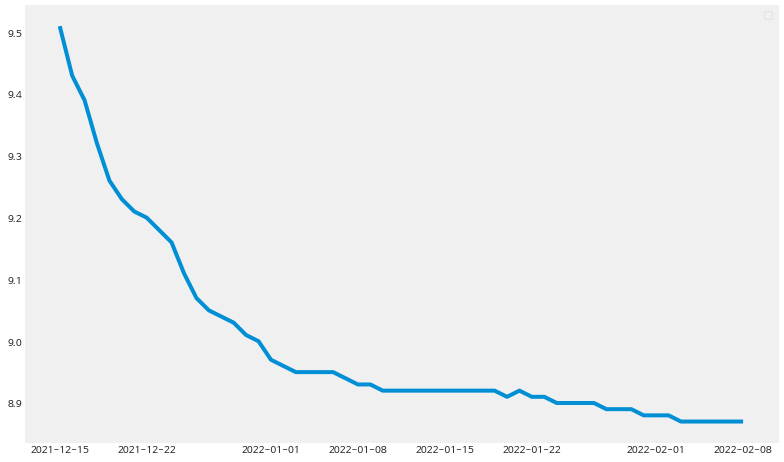

In [12]:
# 스파이더맨 노웨이홈 영화의 기간별 평점
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

- 개봉이후 최고 평점 9.5에서 8.9점까지 떨어지는 모습이다.

## 영화별 날짜 변화에 따른 평점 변화 확인


In [15]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                ...                              
name       007 노 타임 투 다이 120BPM 가을의 전설  ... 호빗: 다섯 군대 전투 혼자 사는 사람들 홀리 모터스
date                                    ...                              
2021-11-01          6.82    NaN   8.67  ...          NaN       NaN   7.51
2021-11-02          6.83    NaN   8.68  ...          NaN       NaN   7.51
2021-11-03          6.83    NaN   8.68  ...          NaN       NaN   7.51
2021-11-04          6.83    NaN   8.68  ...          NaN       NaN    NaN
2021-11-05          6.83    NaN   8.67  ...          NaN       8.1    NaN

[5 rows x 134 columns]

In [16]:
# 맨위의 포인트 열 제거
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,007 노 타임 투 다이,120BPM,가을의 전설,"가장 따뜻한 색, 블루",강릉,걸어도 걸어도,경관의 피,고스트버스터즈 라이즈,고양이를 부탁해,고양이에게 밥을 주지 마세요,고장난 론,공각기동대,귀멸의 칼날: 남매의 연,귀향,그녀,그녀에게,그래비티,그린 나이트,그린 북,극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들,기적,기쿠지로의 여름,꽃다발 같은 사랑을 했다,"나, 다니엘 블레이크",나쁜 교육,날씨의 아이,남매의 여름밤,내겐 너무 소중한 너,너와 파도를 탈 수 있다면,너의 이름은.,너의 췌장을 먹고 싶어,노매드랜드,노회찬6411,다가오는 것들,더 독,더 파더,더 헌트,돈 룩 업,듄,드라이브 마이 카,...,엔칸토: 마법의 세계,여타짜,연애 빠진 로맨스,오즈의 마법사,용과 주근깨 공주,웨스트 사이드 스토리,유체이탈자,윤희에게,이터널스,자산어보,장르만 로맨스,장민호 드라마 최종회,정직한 후보,족구왕,증인,지금은맞고그때는틀리다,지푸라기라도 잡고 싶은 짐승들,천로역정: 천국을 찾아서,초속5센티미터,캐롤,코다,킹메이커,킹스맨: 퍼스트 에이전트,타오르는 여인의 초상,타짜,태일이,특송,"틱, 틱... 붐!",파이란,퍼스널 쇼퍼,프란츠,프렌치 디스패치,하우스 오브 구찌,해적: 도깨비 깃발,해피 뉴 이어,호빗 : 뜻밖의 여정,호빗 : 스마우그의 폐허,호빗: 다섯 군대 전투,혼자 사는 사람들,홀리 모터스
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,6.82,NaN,8.67,NaN,NaN,NaN,NaN,NaN,8.79,NaN,9.22,NaN,NaN,NaN,NaN,NaN,8.3,7.49,9.59,9.22,9.22,NaN,9.09,NaN,NaN,7.96,NaN,NaN,NaN,8.8,NaN,8.47,6.32,NaN,NaN,8.95,NaN,NaN,7.74,NaN,...,NaN,NaN,NaN,NaN,6.57,NaN,NaN,8.97,NaN,9.34,NaN,NaN,NaN,NaN,NaN,6.47,6.62,8.85,NaN,NaN,9.26,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51
2021-11-02,6.83,NaN,8.68,NaN,NaN,NaN,NaN,NaN,8.79,NaN,9.20,NaN,NaN,NaN,NaN,NaN,8.3,7.47,9.59,9.22,9.23,NaN,9.09,NaN,NaN,7.96,NaN,NaN,NaN,8.8,NaN,8.47,6.31,NaN,NaN,8.95,NaN,NaN,7.77,NaN,...,NaN,NaN,NaN,NaN,6.57,NaN,NaN,8.97,NaN,9.34,NaN,NaN,NaN,NaN,NaN,6.47,6.62,8.85,NaN,NaN,9.26,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51
2021-11-03,6.83,NaN,8.68,NaN,NaN,NaN,NaN,NaN,8.79,NaN,9.15,NaN,NaN,NaN,NaN,NaN,NaN,7.46,9.59,9.22,9.22,NaN,9.09,NaN,NaN,7.96,NaN,NaN,NaN,8.8,NaN,8.47,6.29,NaN,7.7,8.95,NaN,NaN,7.79,NaN,...,NaN,NaN,NaN,NaN,6.58,NaN,NaN,8.97,5.86,9.34,NaN,NaN,NaN,NaN,NaN,6.47,6.62,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.51
2021-11-04,6.83,NaN,8.68,NaN,NaN,NaN,NaN,NaN,8.79,NaN,9.14,NaN,NaN,NaN,NaN,NaN,NaN,7.46,9.59,9.23,9.21,NaN,9.09,NaN,NaN,7.96,NaN,NaN,NaN,8.8,NaN,8.47,6.19,NaN,7.7,8.95,NaN,NaN,7.80,NaN,...,NaN,NaN,NaN,NaN,6.59,NaN,NaN,8.97,5.63,9.33,NaN,NaN,NaN,NaN,9.1,NaN,6.62,NaN,NaN,NaN,9.26,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-05,6.83,NaN,8.67,NaN,NaN,NaN,NaN,NaN,8.79,NaN,9.13,NaN,NaN,NaN,NaN,NaN,NaN,7.47,9.59,9.22,9.21,NaN,9.07,NaN,NaN,7.96,NaN,NaN,NaN,8.8,NaN,8.47,6.17,8.35,NaN,8.95,NaN,NaN,7.82,NaN,...,NaN,NaN,NaN,NaN,6.59,NaN,NaN,8.97,5.64,9.33,NaN,NaN,NaN,NaN,9.1,NaN,6.62,NaN,NaN,NaN,9.26,NaN,NaN,9.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN


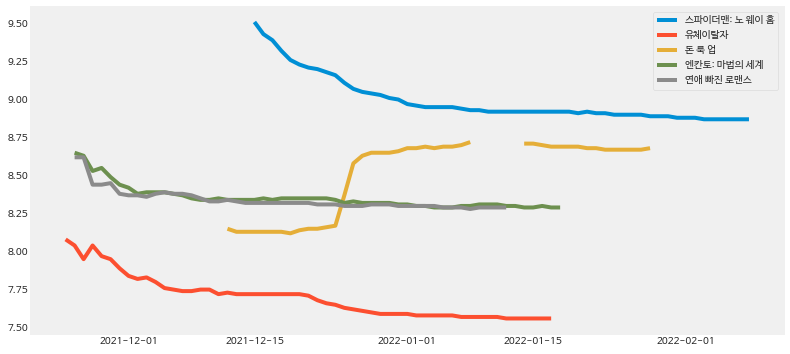

In [18]:
# 스파이더맨: 노 웨이 홈, 유체이탈자, 돈 룩 업, 엔칸토: 마법의 세,연애 빠진 로맨스
target_col = ['스파이더맨: 노 웨이 홈', '유체이탈자', '돈 룩 업', '엔칸토: 마법의 세계','연애 빠진 로맨스']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()

- 대부분의 영화가 개봉하자 평점이 떨어지는 것을 볼 수 있다.

- 특이점으로는 넷플릭스에서 단독개봉한 영화 돈 룩 업의 경우는 오히려 입소문을 타며 평점이 증가하는 모습을 보인다.